In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

import math
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_store = pd.read_csv("stores.csv")

In [3]:
df_features = pd.read_csv("features.csv")

In [4]:
df_train = pd.read_csv("train.csv")

In [5]:
df_test = pd.read_csv("test.csv")

In [6]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [11]:
train = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')

In [12]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [14]:
#duplicate column is dropped
train.drop(['IsHoliday_y'], axis=1,inplace=True)

In [15]:
train.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [16]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [17]:
train.shape

(421570, 16)

In [18]:
train.Store.nunique()

45

In [19]:
train.Dept.nunique()

81

In [20]:
train['Date'].head(5)._append(train['Date'].tail(5))

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

<Axes: xlabel='Store'>

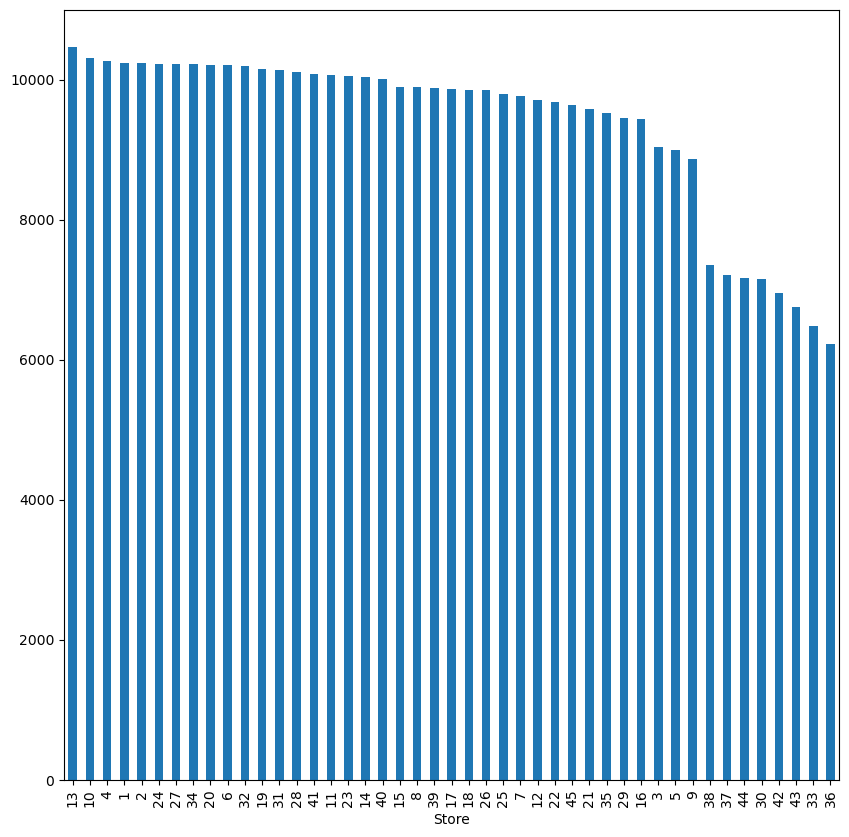

In [21]:
train['Store'].sort_index().value_counts(normalize=False).plot(kind = 'bar',figsize=(10,10))

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

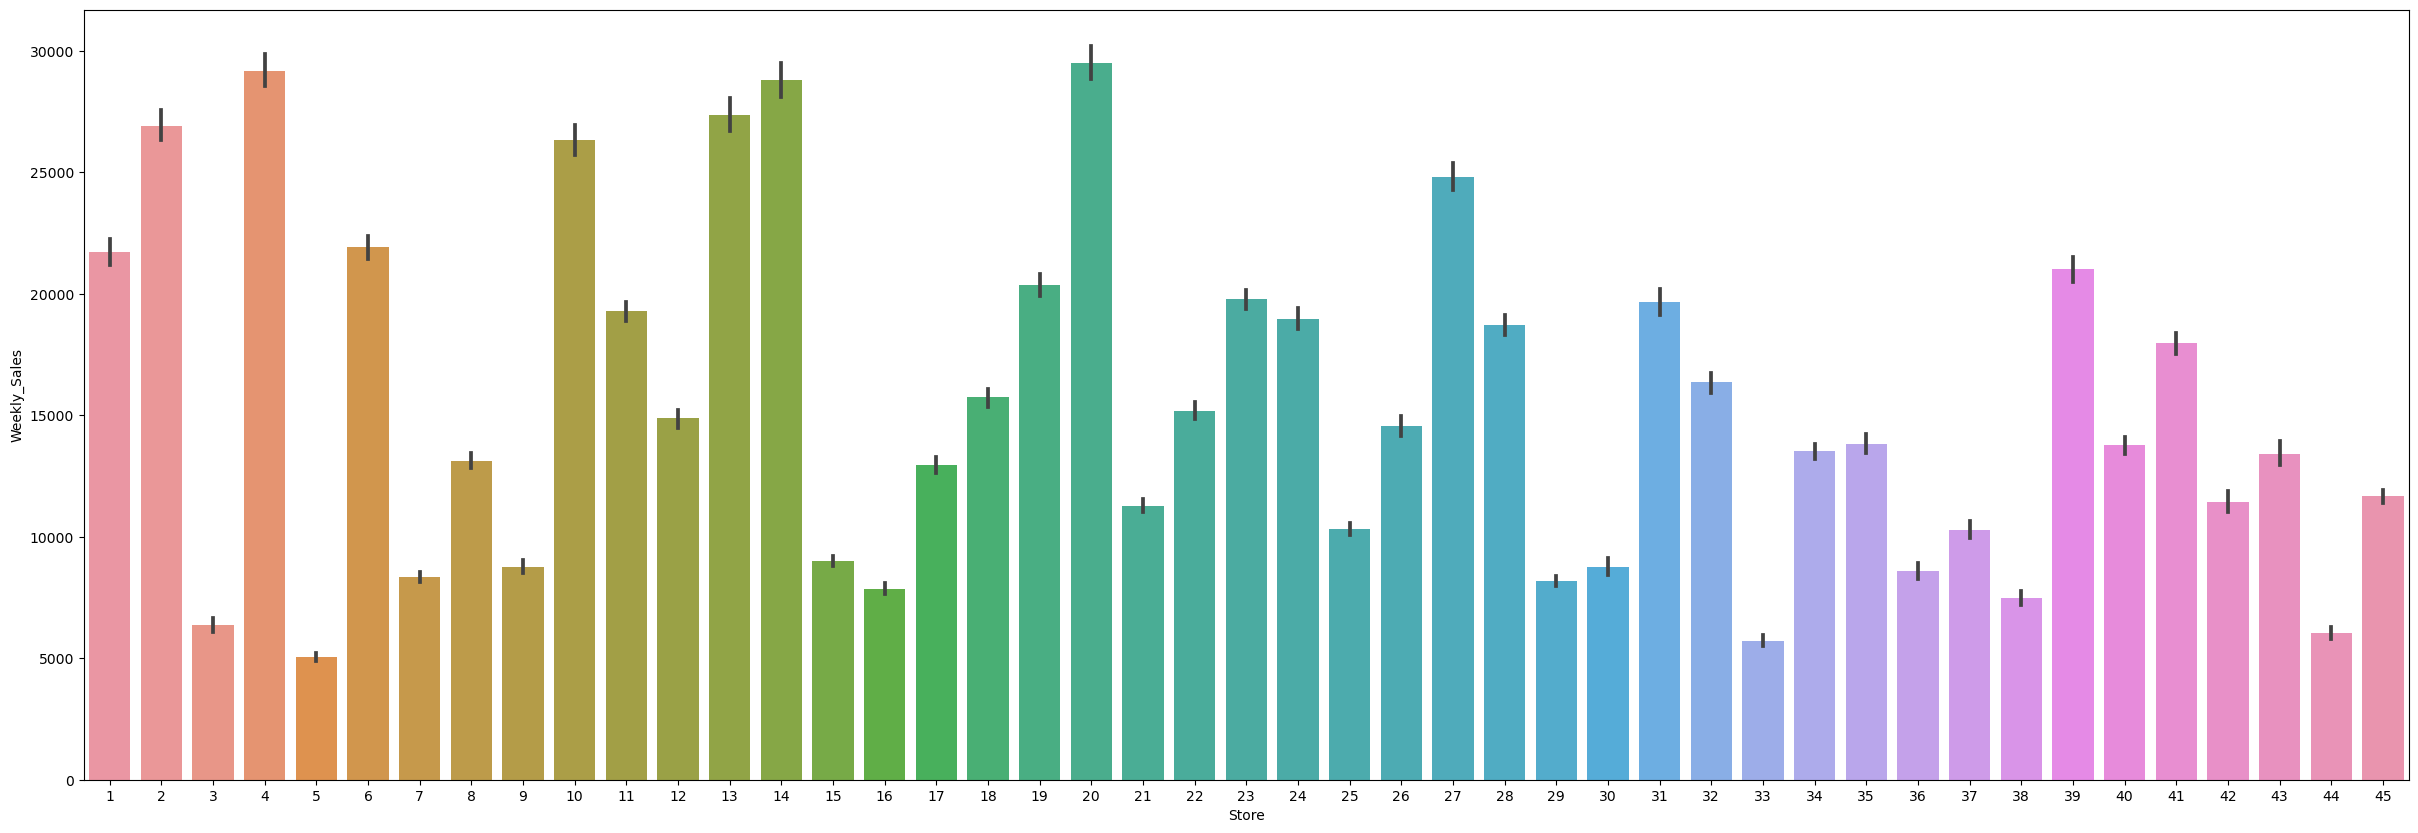

In [22]:
plt.figure(figsize=(30,10))
sns.barplot(x=train['Store'], y=train['Weekly_Sales'], data=train)

<Axes: xlabel='Dept'>

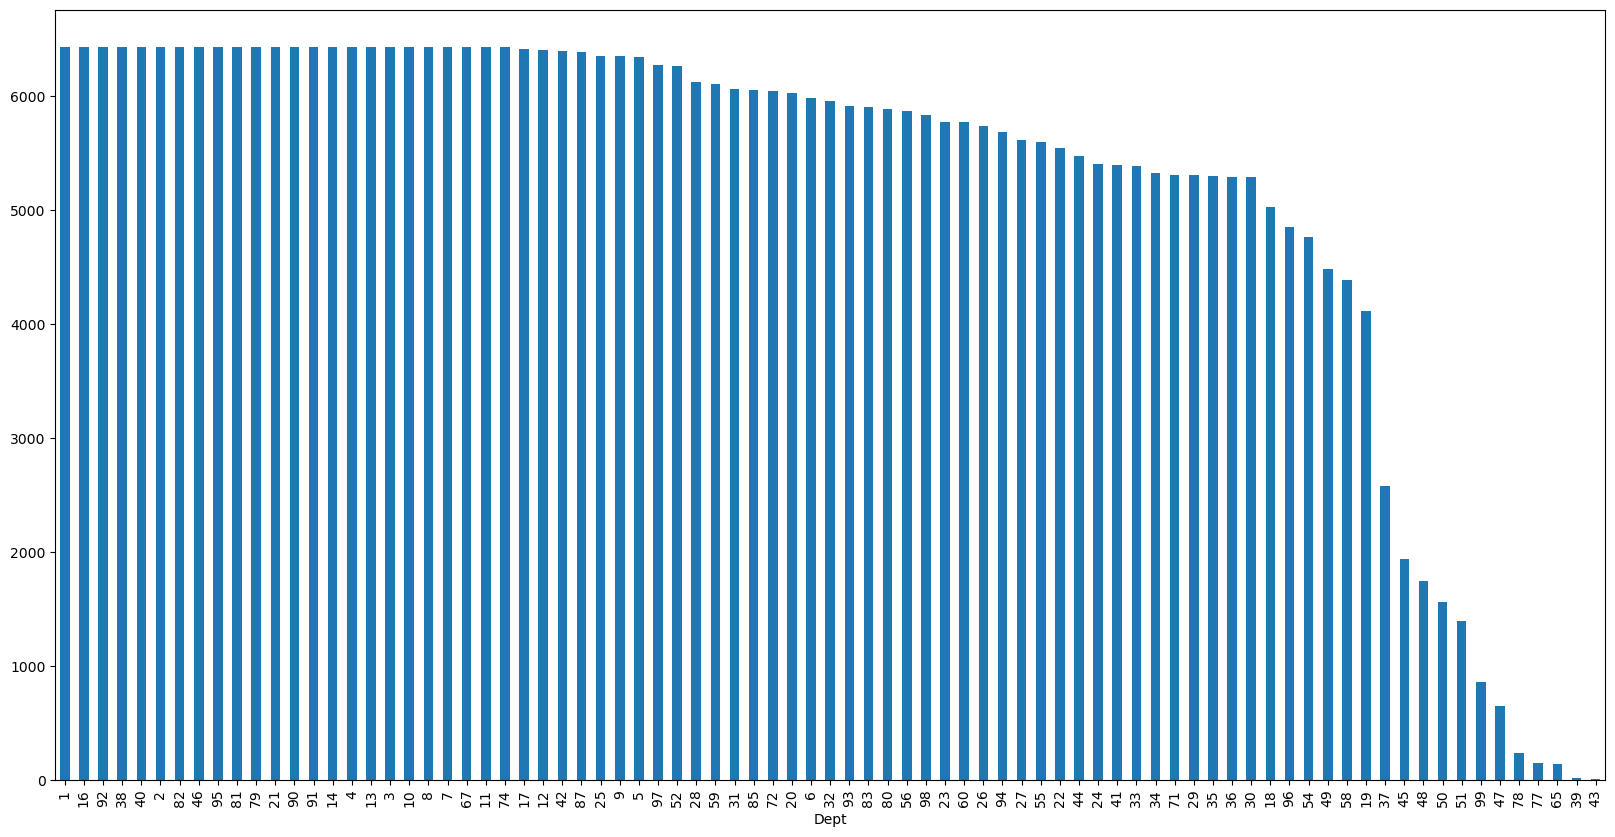

In [23]:
plt.figure(figsize=(20,10))
train.Dept.value_counts(normalize=False).plot(kind = 'bar')

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

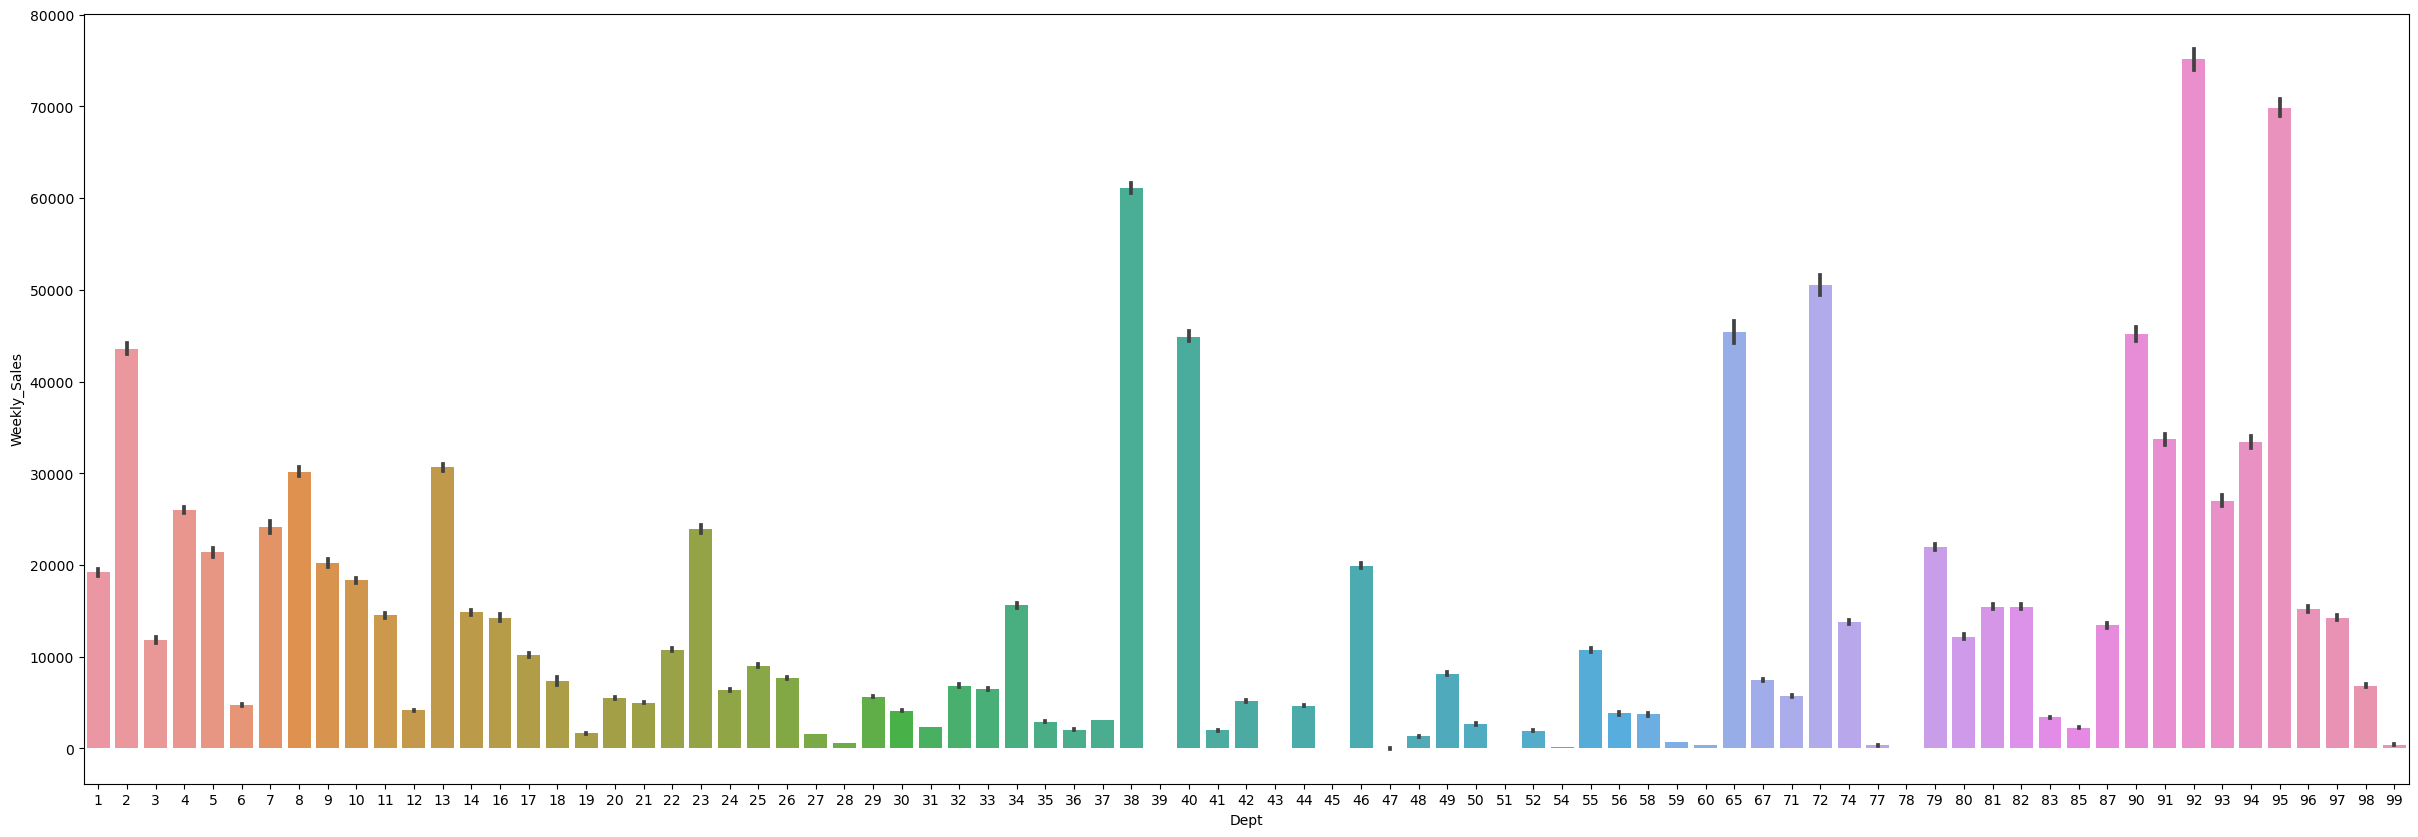

In [24]:
plt.figure(figsize=(30,10))
sns.barplot(x=train['Dept'], y= train['Weekly_Sales'], data=train)

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

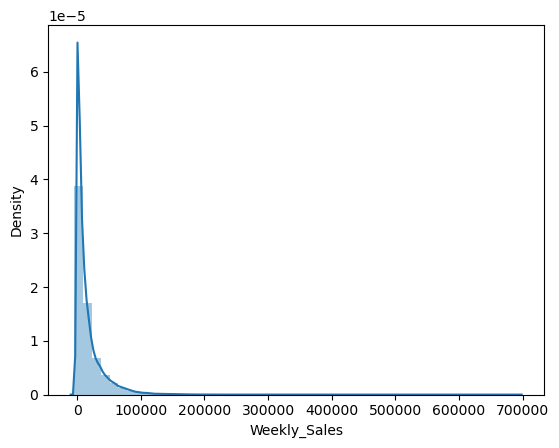

In [25]:
sns.distplot(train.Weekly_Sales)

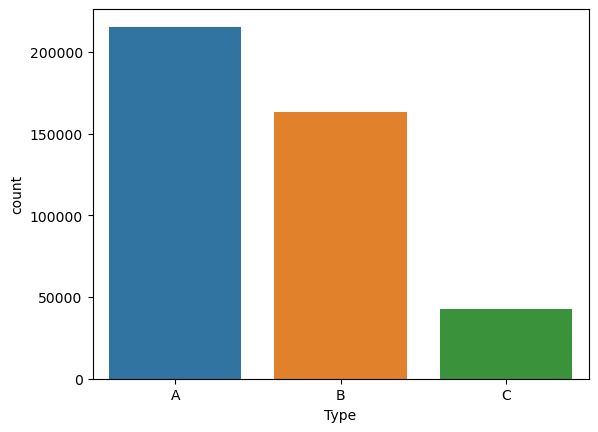

In [26]:
num = sns.countplot(x='Type', data=train)

In [27]:
type_count = train['Type'].value_counts()

In [28]:
type_count

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

<Axes: ylabel='count'>

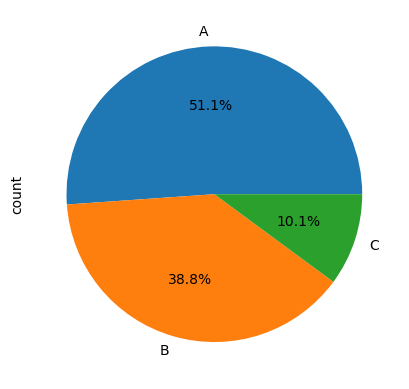

In [29]:
type_count.plot.pie(autopct='%1.1f%%')

Text(0.5, 1.0, 'Holiday v/s Weekly Sales')

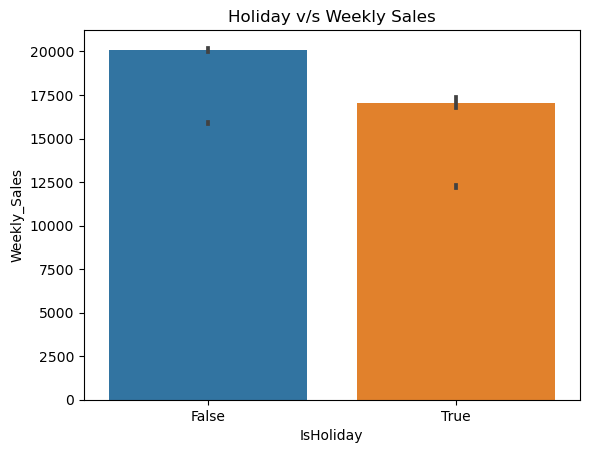

In [30]:
sns.barplot(x=train["Type"],y=train["Weekly_Sales"])

sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train)
plt.title("Holiday v/s Weekly Sales")

In [31]:
df_holiday = train.loc[train['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [32]:
df_holiday['Date'].nunique()

10

In [33]:
df_not_holiday = train.loc[train['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

In [34]:
train.loc[(train['Date'] == '2010-02-12')|(train['Date'] == '2011-02-11')|(train['Date'] == '2012-02-10'),'Super_Bowl'] = True
train.loc[(train['Date'] != '2010-02-12')&(train['Date'] != '2011-02-11')&(train['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [35]:
train.loc[(train['Date'] == '2010-09-10')|(train['Date'] == '2011-09-09')|(train['Date'] == '2012-09-07'),'Labor_Day'] = True
train.loc[(train['Date'] != '2010-09-10')&(train['Date'] != '2011-09-09')&(train['Date'] != '2012-09-07'),'Labor_Day'] = False

In [36]:
train.loc[(train['Date'] == '2010-11-26')|(train['Date'] == '2011-11-25'),'Thanksgiving'] = True
train.loc[(train['Date'] != '2010-11-26')&(train['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [37]:
train.loc[(train['Date'] == '2010-12-31')|(train['Date'] == '2011-12-30'),'Christmas'] = True
train.loc[(train['Date'] != '2010-12-31')&(train['Date'] != '2011-12-30'),'Christmas'] = False

Text(0.5, 1.0, 'Christmas Holiday v/s Weekly Sales')

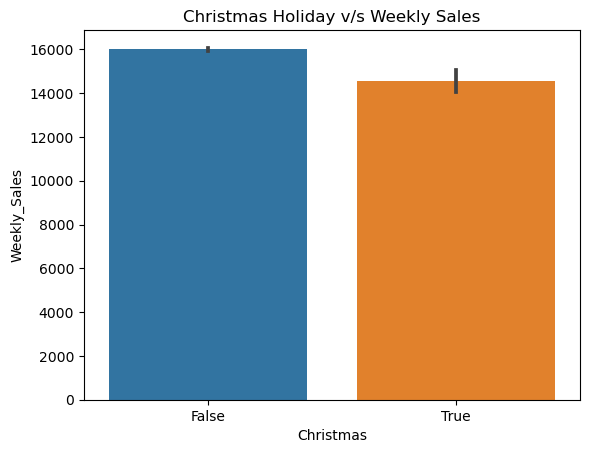

In [38]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=train)
plt.title("Christmas Holiday v/s Weekly Sales")

Text(0.5, 1.0, 'Thanksgiving Holiday v/s Weekly Sales')

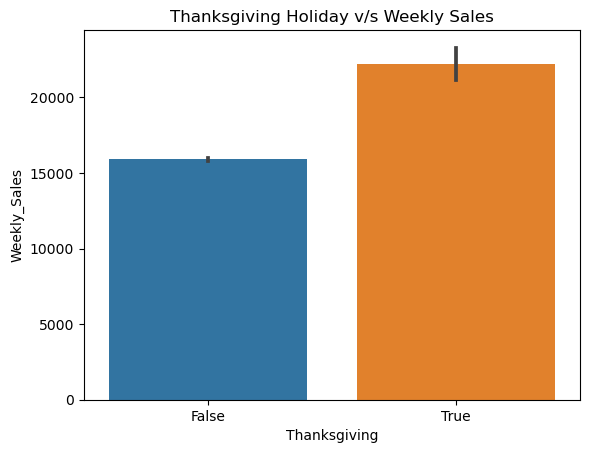

In [39]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=train)
plt.title("Thanksgiving Holiday v/s Weekly Sales")

Text(0.5, 1.0, 'Superbowl Holiday v/s Weekly Sales')

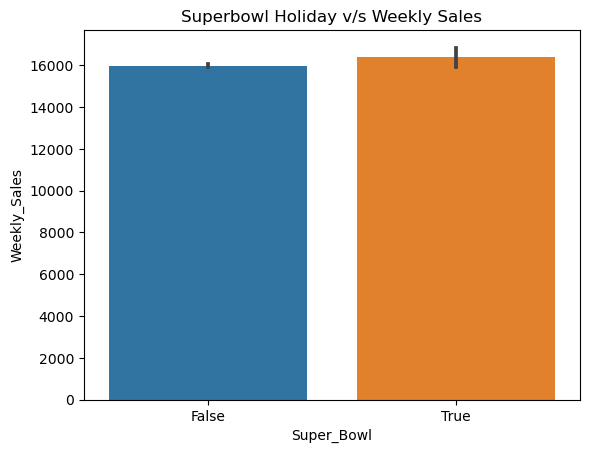

In [40]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=train)
plt.title("Superbowl Holiday v/s Weekly Sales")

Text(0.5, 1.0, 'Labor Day Holiday v/s Weekly Sales')

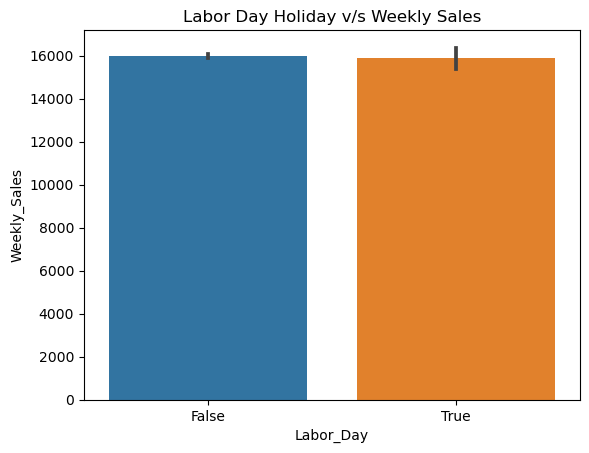

In [41]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=train)
plt.title("Labor Day Holiday v/s Weekly Sales")

In [42]:
train.groupby(['Christmas','Type'])['Weekly_Sales'].mean()

Christmas  Type
False      A       20126.297990
           B       12249.152357
           C        9541.691864
True       A       18231.031306
           B       11394.051524
           C        7963.228980
Name: Weekly_Sales, dtype: float64

In [43]:
train.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20102.291095
           B       12241.858749
           C        9512.019024
True       A       19973.219881
           B       12013.482757
           C        9871.225746
Name: Weekly_Sales, dtype: float64

In [44]:
train.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       19995.309014
              B       12144.563438
              C        9517.272388
True          A       27370.728296
              B       18661.296519
              C        9679.900152
Name: Weekly_Sales, dtype: float64

In [45]:
train.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20088.683671
            B       12233.518469
            C        9506.055492
True        A       20603.690832
            B       12401.718198
            C       10156.204711
Name: Weekly_Sales, dtype: float64

In [46]:
type_a = train[train['Type'] == 'A']
type_b = train[train['Type'] == 'B']
type_c = train[train['Type'] == 'C']

In [47]:
mean_sales_super_bowl = type_a[type_a['Super_Bowl'] == True]['Weekly_Sales'].mean()
mean_sales_christmas = type_a[type_a['Christmas'] == True]['Weekly_Sales'].mean()
mean_sales_thanksgiving = type_a[type_a['Thanksgiving'] == True]['Weekly_Sales'].mean()
mean_sales_labor_day = type_a[type_a['Labor_Day'] == True]['Weekly_Sales'].mean()
A_means = [mean_sales_thanksgiving, mean_sales_super_bowl, mean_sales_labor_day, mean_sales_christmas]
A_means = np.around(A_means, 2)
A_means

array([27370.73, 20603.69, 19973.22, 18231.03])

In [48]:
mean_sales_super_bowl = type_b[type_b['Super_Bowl'] == True]['Weekly_Sales'].mean()
mean_sales_christmas = type_b[type_b['Christmas'] == True]['Weekly_Sales'].mean()
mean_sales_thanksgiving = type_b[type_b['Thanksgiving'] == True]['Weekly_Sales'].mean()
mean_sales_labor_day = type_b[type_b['Labor_Day'] == True]['Weekly_Sales'].mean()
B_means = [mean_sales_thanksgiving, mean_sales_super_bowl, mean_sales_labor_day, mean_sales_christmas]
B_means = np.around(B_means, 2)
B_means

array([18661.3 , 12401.72, 12013.48, 11394.05])

In [49]:
mean_sales_super_bowl = type_c[type_c['Super_Bowl'] == True]['Weekly_Sales'].mean()
mean_sales_christmas = type_c[type_c['Christmas'] == True]['Weekly_Sales'].mean()
mean_sales_thanksgiving = type_c[type_c['Thanksgiving'] == True]['Weekly_Sales'].mean()
mean_sales_labor_day = type_c[type_c['Labor_Day'] == True]['Weekly_Sales'].mean()
C_means = [mean_sales_thanksgiving, mean_sales_super_bowl, mean_sales_labor_day, mean_sales_christmas]
C_means = np.around(C_means, 2)
C_means

array([ 9679.9 , 10156.2 ,  9871.23,  7963.23])

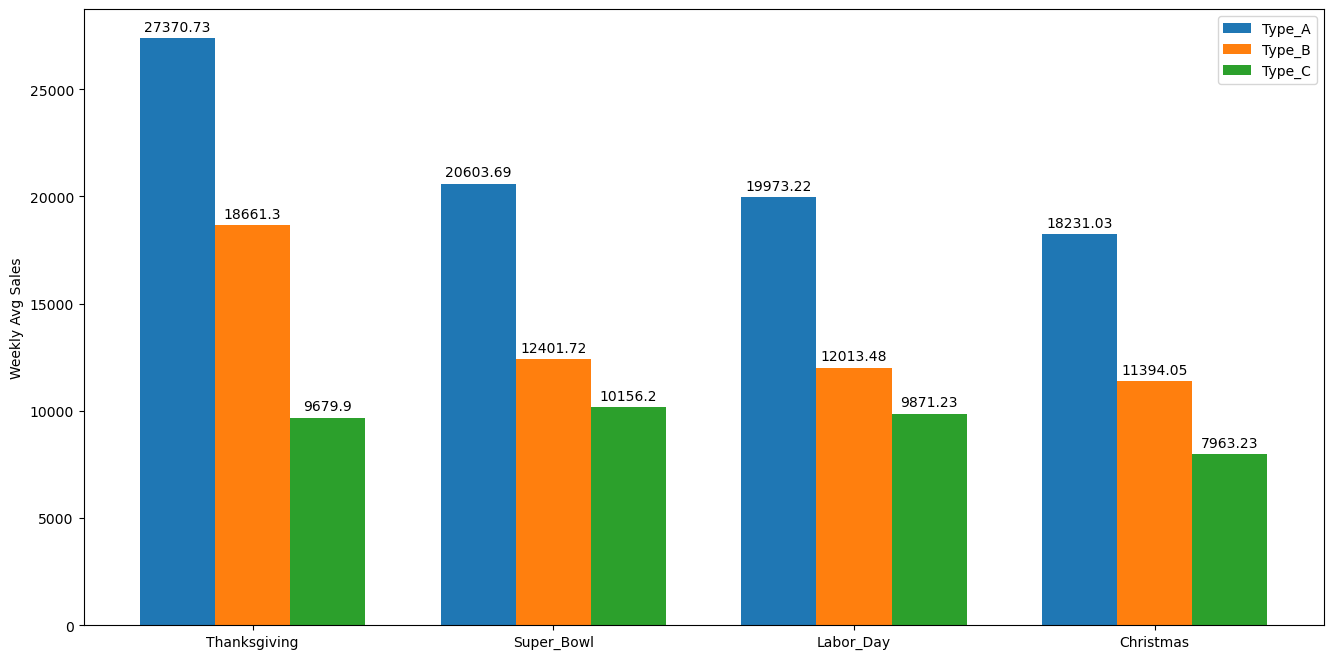

In [50]:
# plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
x = np.arange(len(labels))  
width = 0.25  

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')


ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

In [51]:
train["Date"] = pd.to_datetime(train["Date"]) # convert to datetime
train['week'] = train['Date'].dt.isocalendar().week
train['month'] = train['Date'].dt.month
train['year'] = train['Date'].dt.year

In [52]:
train.groupby('month')['Weekly_Sales'].mean()

month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

In [53]:
train.groupby('year')['Weekly_Sales'].mean()

year
2010    16270.275737
2011    15954.070675
2012    15694.948597
Name: Weekly_Sales, dtype: float64

In [54]:
train.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=True).head()

week
4     13530.033667
2     14030.667886
3     14077.870442
39    14485.827993
38    14515.275571
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month', ylabel='Weekly_Sales'>

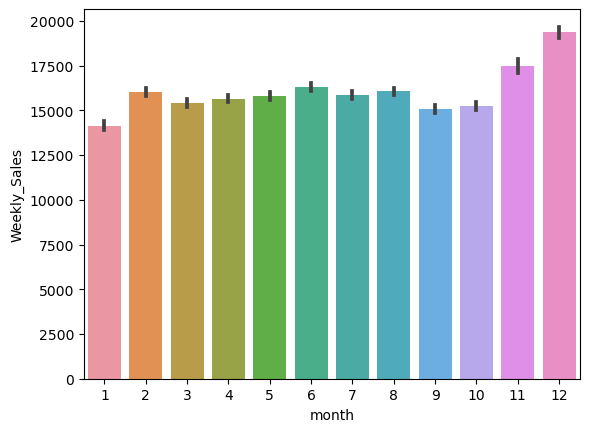

In [55]:
sns.barplot(x='month', y='Weekly_Sales', data=train)

<Axes: xlabel='month'>

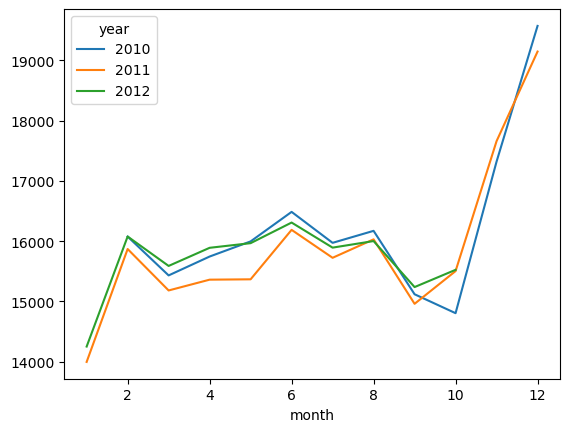

In [56]:
monthly_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

<Axes: xlabel='week', ylabel='Weekly_Sales'>

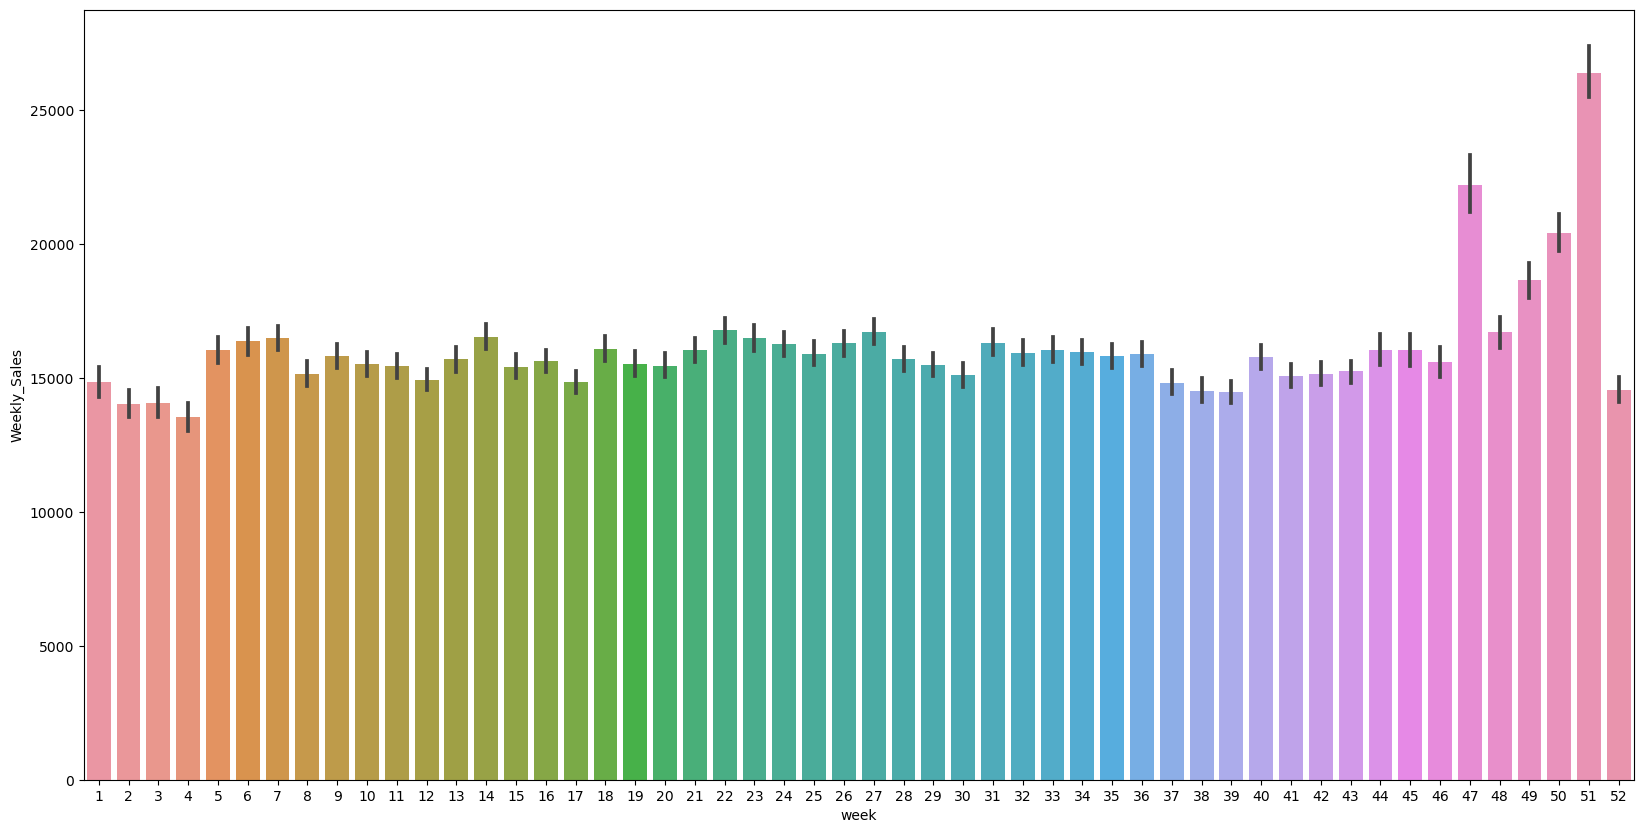

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x='week', y='Weekly_Sales', data=train)

<Axes: xlabel='week'>

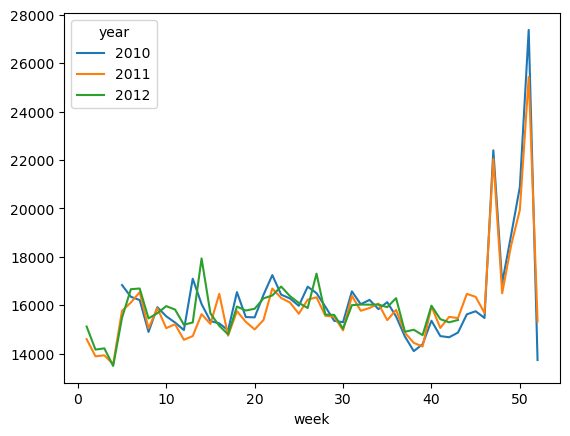

In [58]:
weekly_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()